In [1]:
import tensorflow as tf
import os


In [2]:
os.listdir('/content/drive/MyDrive/Flow  Images/data')

['laminar', 'turbulent']

In [3]:
import cv2

In [4]:
img= cv2.imread('/content/drive/MyDrive/Flow  Images/data/laminar/lamianr.png')

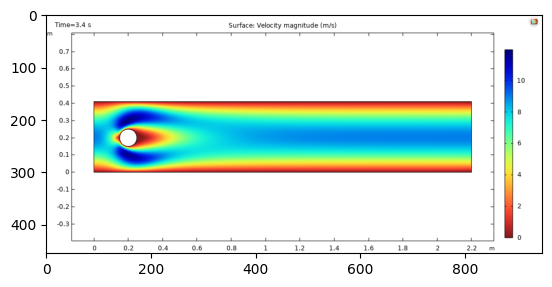

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [6]:
img.shape

(455, 948, 3)

In [7]:
urls = os.listdir('/content/drive/MyDrive/Flow  Images/data/laminar')

In [8]:
path = "/content/drive/MyDrive/Flow  Images/data/laminar" + urls[0]

In [9]:
path

'/content/drive/MyDrive/Flow  Images/data/laminarCopy of Screenshot 2024-05-09 220901.png'

In [10]:
import pandas as pd
import numpy as np

In [11]:
import cv2

def loadImages(path, urls, target):
    images = []
    labels = []
    for i in range(len(urls)):
        img_path = path + "/" + urls[i]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = img / 255.0
        img = cv2.resize(img, (500, 500))
        images.append(img)
        labels.append(target)
    images = np.asarray(images)
    return images, labels


In [12]:
Laminar_path='/content/drive/MyDrive/Flow  Images/data/laminar'
Laminarurl=os.listdir('/content/drive/MyDrive/Flow  Images/data/laminar')
Laminarimages,Laminartargets=loadImages(Laminar_path,Laminarurl,0)

In [13]:
len(Laminarimages),len(Laminartargets)

(188, 188)

In [14]:
Turbulent_path='/content/drive/MyDrive/Flow  Images/data/turbulent'
Turbulenturl=os.listdir('/content/drive/MyDrive/Flow  Images/data/turbulent')
Turbulentimages,Turbulenttargets=loadImages(Turbulent_path,Turbulenturl,1)

In [15]:
len(Turbulentimages),len(Turbulenttargets)

(154, 154)

In [16]:
Laminarimages = np.asarray(Laminarimages)
Turbulentimages = np.asarray(Turbulentimages)

In [17]:
Turbulentimages.shape

(154, 500, 500)

In [18]:
Laminarimages.shape

(188, 500, 500)

In [19]:
data = np.r_[Laminarimages,Turbulentimages]

In [20]:
data.shape


(342, 500, 500)

In [21]:
targets = np.r_[Laminartargets,Turbulenttargets]

In [22]:
targets.shape

(342,)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [24]:
augmented_data = []
augmented_targets = []
for img, target in zip(data, targets):
     # Apply augmentation techniques to each image
     # Example: horizontal flip
     augmented_img = cv2.flip(img, 1)
     augmented_data.append(augmented_img)
     augmented_targets.append(target)

In [25]:
augmented_data = np.asarray(augmented_data)
augmented_targets = np.asarray(augmented_targets)

In [26]:
indices = np.random.permutation(augmented_data.shape[0])
data = augmented_data[indices]
targets = augmented_targets[indices]

In [27]:
x_to_train,x_test, y_to_train,y_test = train_test_split(data,targets, test_size=0.25,random_state = 42)
print(x_to_train.shape)
print(x_test.shape)

(256, 500, 500)
(86, 500, 500)


In [28]:
mean_value_ = np.mean(x_test)
std_value_ = np.std(x_test)

# Normalize the images
x_test = (x_test - mean_value_)/std_value_

In [29]:
x_train,x_val, y_train,y_val = train_test_split(x_to_train,y_to_train, test_size=0.25,random_state = 42)
print(x_train.shape)

print(x_val.shape)

(192, 500, 500)
(64, 500, 500)


In [30]:
mean_value = np.mean(x_train)
std_value = np.std(x_train)

# Normalize the images
x_train = (x_train - mean_value)/std_value

In [31]:
mean_value = np.mean(x_val)
std_value = np.std(x_val)

# Normalize the images
x_val = (x_val - mean_value)/std_value

In [32]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)


In [33]:
print(y_train.shape)

(192, 2)


In [34]:
y_train = np.asarray(y_train[:, 1], dtype=int)
y_test = np.asarray(y_test[:, 1], dtype=int)
y_val = np.asarray(y_val[:, 1], dtype=int)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(192, 500, 500)
(86, 500, 500)
(64, 500, 500)
(192,)
(86,)
(64,)


In [36]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

In [37]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(500, 500, 1), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [41]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
model.fit(x_train, y_train,batch_size=32,epochs=18,validation_data=(x_val, y_val))

Epoch 1/18
6/6 [==============================] - 21s 375ms/step - loss: 0.9163 - accuracy: 0.5417 - val_loss: 0.6739 - val_accuracy: 0.5000
Epoch 2/18
6/6 [==============================] - 2s 275ms/step - loss: 0.6648 - accuracy: 0.5833 - val_loss: 0.6088 - val_accuracy: 0.6094
Epoch 3/18
6/6 [==============================] - 2s 274ms/step - loss: 0.5899 - accuracy: 0.6667 - val_loss: 0.6047 - val_accuracy: 0.6094
Epoch 4/18
6/6 [==============================] - 2s 276ms/step - loss: 0.5563 - accuracy: 0.7240 - val_loss: 0.5320 - val_accuracy: 0.7500
Epoch 5/18
6/6 [==============================] - 2s 277ms/step - loss: 0.4758 - accuracy: 0.7969 - val_loss: 0.4101 - val_accuracy: 0.7969
Epoch 6/18
6/6 [==============================] - 2s 275ms/step - loss: 0.4215 - accuracy: 0.8490 - val_loss: 0.4391 - val_accuracy: 0.7969
Epoch 7/18
6/6 [==============================] - 2s 305ms/step - loss: 0.2982 - accuracy: 0.9010 - val_loss: 0.5306 - val_accuracy: 0.8125
Epoch 8/18
6/6 [===

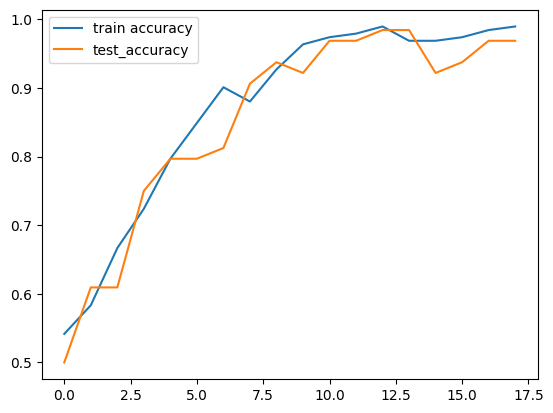

In [43]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

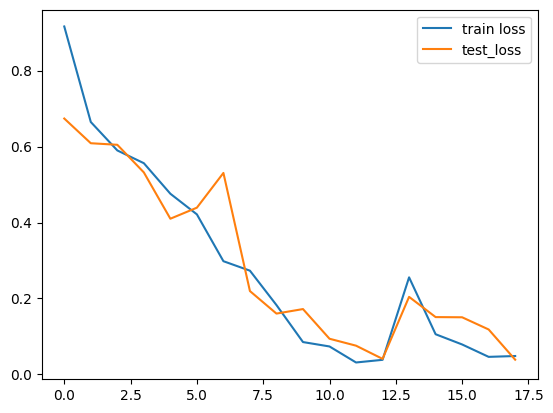

In [44]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [45]:
predictions = model.predict(x_test)


3/3 [==============================] - 2s 1s/step


In [46]:
predictions

array([[2.5892608e-18],
       [8.7368219e-09],
       [6.8777974e-04],
       [9.9575764e-01],
       [4.5812762e-09],
       [1.0000000e+00],
       [2.1832709e-06],
       [1.2695176e-05],
       [8.5125159e-04],
       [9.9735475e-01],
       [1.8877489e-03],
       [1.0000000e+00],
       [4.4278910e-21],
       [8.8048828e-01],
       [6.4075585e-09],
       [9.9999928e-01],
       [1.3800946e-02],
       [9.9999797e-01],
       [3.7350138e-03],
       [2.6831439e-09],
       [4.3022630e-14],
       [1.0000000e+00],
       [9.9976331e-01],
       [9.9999666e-01],
       [9.7903553e-03],
       [9.9935263e-01],
       [9.9900120e-01],
       [1.7821675e-06],
       [2.4795315e-01],
       [1.7406769e-02],
       [9.9999809e-01],
       [9.9965060e-01],
       [1.9385102e-03],
       [3.4881961e-01],
       [5.7764964e-19],
       [6.2047783e-03],
       [9.9997008e-01],
       [9.8099363e-01],
       [1.0000000e+00],
       [1.6550574e-06],
       [2.3604713e-03],
       [2.819815

In [47]:
binary_predictions = (predictions >= 0.5).astype(int)

In [48]:
binary_predictions

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
y_test

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [51]:
accuracy = accuracy_score(y_test, binary_predictions )
print("Accuracy:", accuracy*100)


Accuracy: 97.67441860465115
